#**Normal Distribution - Using QQ Plots**


In [1]:
# Load iris data
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import seaborn as sns

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

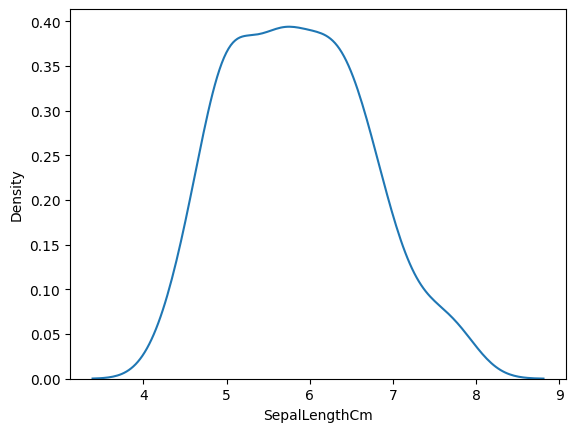

In [28]:
sns.kdeplot(data = df['SepalLengthCm'])
# Seems like normal distribution

In [18]:
# Calculating percentiles
real = []

# Sorting
actual_data = sorted(list(df['SepalLengthCm'])) # This is array now

for i in range(0, 101):
  real.append(np.percentile(actual_data, i))

In [19]:
# Working on Theritical data
therotical = []

therotical_data = [i for i in range(0, 101)]

for i in range(0, 101):
  therotical.append(np.percentile(therotical_data, i))

In [20]:
import matplotlib.pyplot as plt

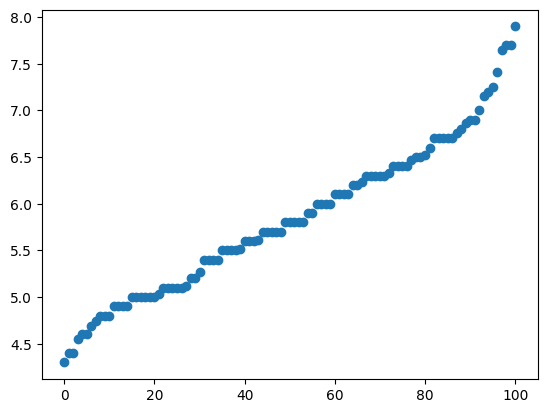

In [21]:
plt.scatter(x = therotical, y = real)
plt.show()

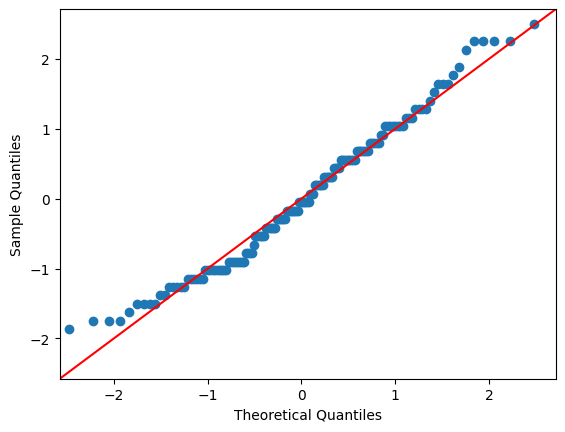

In [26]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(data = df['SepalLengthCm'], line = '45', fit = True) # for normal distribution the line = 45
plt.show()

#**Uniform Destribution - using QQ Plots**

In [30]:
data = np.random.uniform(low = 0, high = 1, size = 1000)

(array([ 94., 111.,  99., 102.,  99.,  99., 104.,  87., 112.,  93.]),
 array([5.55853792e-05, 9.96444680e-02, 1.99233351e-01, 2.98822233e-01,
        3.98411116e-01, 4.97999999e-01, 5.97588881e-01, 6.97177764e-01,
        7.96766646e-01, 8.96355529e-01, 9.95944412e-01]),
 <BarContainer object of 10 artists>)

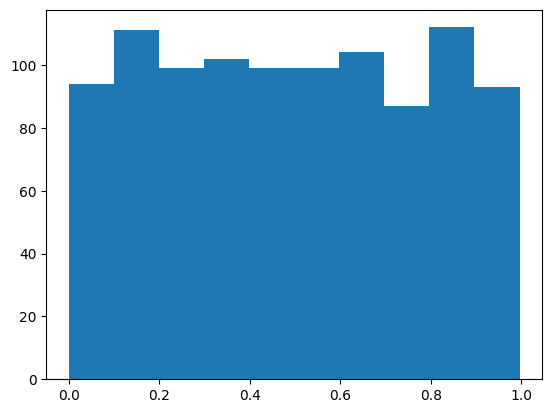

In [32]:
plt.hist(data)

In [36]:
params = stats.uniform.fit(data)
print(params) # from the distribution of data this methods learns the location and scale and for creating the therotical data

# Creating a therotical destribution which is uniform
dist = stats.uniform(loc = params[0], scale = params[1])

(5.5585379179379224e-05, 0.9958888263328477)


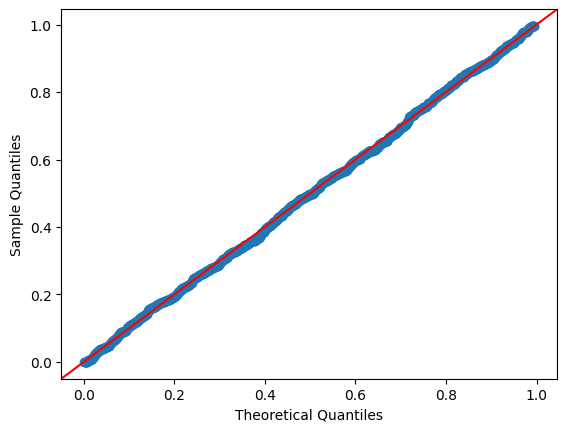

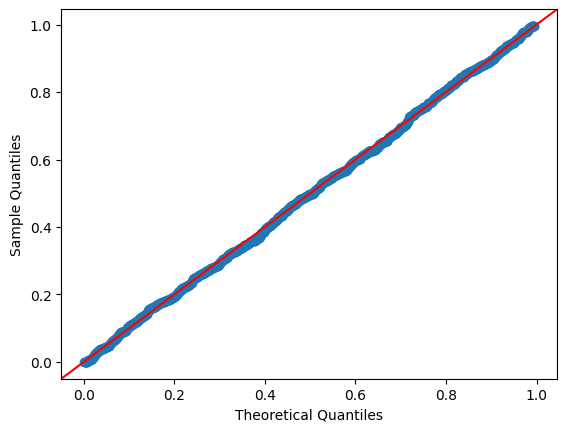

In [41]:
sm.qqplot(data, dist = dist, line = '45')

#**Pareto Destribution - Using QQ PLots**

In [62]:
x = np.linspace(0.1, 10, 1000)

xm = 1
alpha = 0.1

In [63]:
# Creating a y values from PDF equation
y = (alpha * (xm ** alpha)) / (x ** (alpha + 1))

In [64]:
np.ndim(y)

1

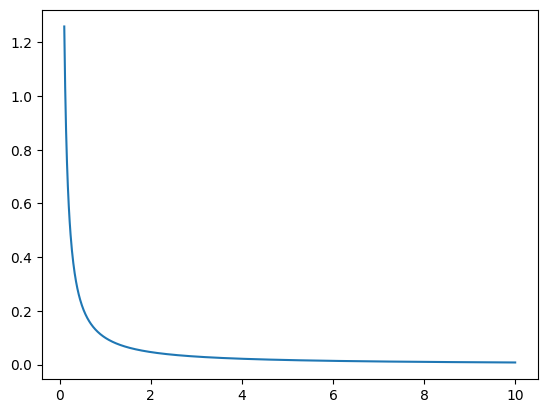

In [65]:
plt.plot(x, y)

#***Using Log-Log Plot***

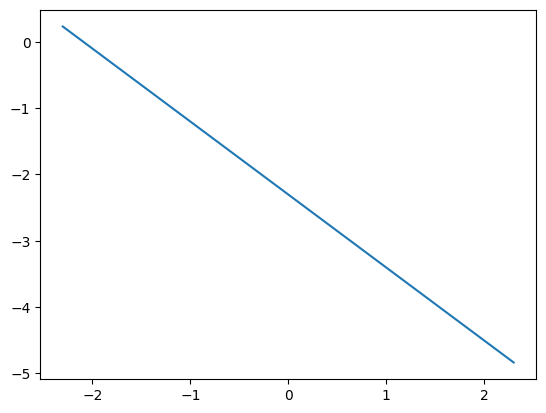

In [69]:
# Varifying this plot is Pareto Destribution

plt.plot(np.log(x), np.log(y))

#***Using QQ Plot***

In [88]:
# As like uniform destribution - we have to create a theoritical values of pareto destribution
alpha = 2
xm = 1
x = stats.pareto.rvs(b = alpha, scale = xm, size = 1000)

In [ ]:
plt.hist(x)

In [102]:
params = stats.pareto.fit(x, floc = 0)
print(params)
'''
param[0] -> xm
param[1] -> location
param[2] -> scale
'''
dist = stats.pareto(b = params[0], scale= params[2])

(2.1108181174764438, 0, 1.000555251850671)


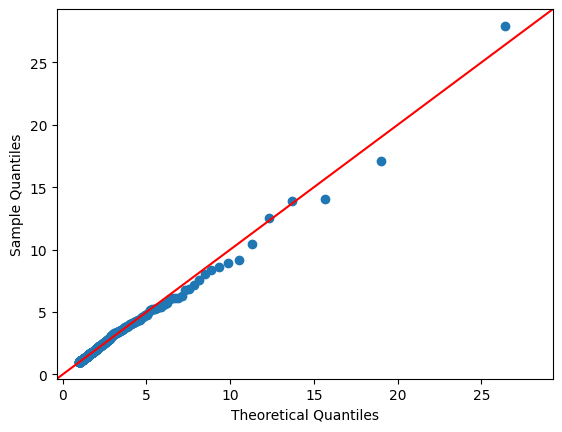

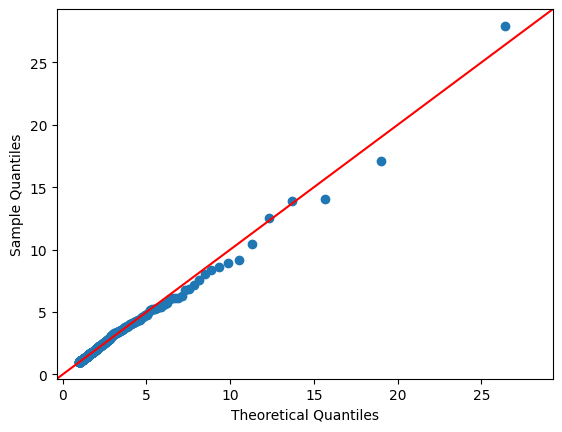

In [103]:
sm.qqplot(x, dist = dist, line= '45')